> ### EEE4423: Signal Processing Lab

# LAB \#2: Machine Learning Basics:
## Linear Regression, Logistic Regression, Multi-Layer Perceptron

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-01-08 14:37:42.332042


# Linear Regression with PyTorch

## 1. About Linear Regression


### 1.1 Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - Weight
    - y: dependent variable
        - Height
- $y=\alpha x + \beta$


### 1.2 Example of simple linear regression

**Create plot for simple linear regression**

Take note that this code is not important at all. It simply creates random data points and does a simple best-fit line to best approximate the underlying function if one even exists.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

In [4]:
# Makes the dots colorful
colors = np.random.rand(n)

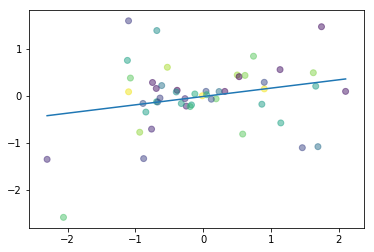

In [5]:
# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

**Create a list of values from 0 to 11**

In [2]:
import numpy as np

In [4]:
x_values = [i for i in range(11)]

In [5]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

**Convert list of numbers to numpy array**

In [6]:
# convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

**Convert to 2-dimensional array**

If you don't this you will get an error stating you need 2D. Simply just reshape accordingly if you ever face such errors down the road.

In [7]:
# Important : 2-Dimension is required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

**Create list of y values**

We want y values for every x value we have above. 
    
$y = 2x + 1$

In [8]:
y_values = [2*i+1 for i in x_values]

In [9]:
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

**Convert to numpy array**

You will slowly get a hang on how when you deal with PyTorch tensors, you just keep on making sure your raw data is in numpy form to make sure everything's good.

In [10]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

**Reshape y numpy array to 2-dimension**

In [11]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

**Critical Imports**

In [12]:
import torch
import torch.nn as nn

**Create Model**

1. Linear model
    - True Equation: $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1$
        - Output $\hat y = ?$

In [13]:
# create class
class LinearRegressionModel (nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**

- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [14]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [15]:
criterion = nn.MSELoss() # Mean Squared error

**Instantiate Optimizer Class**

- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta$
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$ 

In [16]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**

- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
            
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [17]:
epochs = 100

In [19]:
for epoch in range(epochs):
    epoch += 1
    # 1) convert numpy array to torch variable
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    
    # 2) clear gradients with respect to parameters of model
    optimizer.zero_grad()
    
    # 3) forward to get output
    outputs = model(inputs)
    
    # 4) calculate loss
    loss = criterion(outputs, labels)
    
    # 5) getting gradients w.r.t. parameters
    loss.backward()
    
    # 6) updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 142.97166442871094
epoch 2, loss 11.741623878479004
epoch 3, loss 1.0367070436477661
epoch 4, loss 0.16265855729579926
epoch 5, loss 0.09049323946237564
epoch 6, loss 0.08374466747045517
epoch 7, loss 0.08234144747257233
epoch 8, loss 0.08138369023799896
epoch 9, loss 0.08047176152467728
epoch 10, loss 0.07957299798727036
epoch 11, loss 0.07868427038192749
epoch 12, loss 0.07780573517084122
epoch 13, loss 0.07693682610988617
epoch 14, loss 0.07607768476009369
epoch 15, loss 0.07522815465927124
epoch 16, loss 0.07438808679580688
epoch 17, loss 0.07355744391679764
epoch 18, loss 0.07273602485656738
epoch 19, loss 0.07192382216453552
epoch 20, loss 0.07112062722444534
epoch 21, loss 0.07032637298107147
epoch 22, loss 0.06954120099544525
epoch 23, loss 0.06876461207866669
epoch 24, loss 0.06799671798944473
epoch 25, loss 0.06723742932081223
epoch 26, loss 0.066486656665802
epoch 27, loss 0.06574422121047974
epoch 28, loss 0.06500998884439468
epoch 29, loss 0.06428395956754684

**Looking at predicted values**

In [20]:
# purely inference
predicted = model(torch.from_numpy(x_train)).data.numpy()

In [21]:
predicted

array([[ 0.68342334],
       [ 2.7290132 ],
       [ 4.7746034 ],
       [ 6.8201933 ],
       [ 8.865783  ],
       [10.911372  ],
       [12.956963  ],
       [15.002553  ],
       [17.048143  ],
       [19.093733  ],
       [21.139322  ]], dtype=float32)

**Looking at training values**

These are the true values, you can see how it's able to predict similar values.

In [22]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot of predicted and actual values**

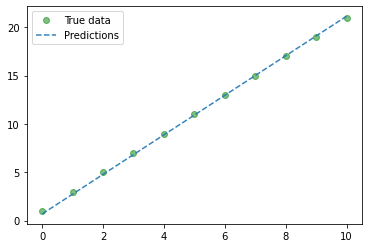

In [26]:
import matplotlib.pyplot as plt

# 1) clear figure
plt.clf()

# 2) get predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# 3) plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# 4) plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.9)

# 5) legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [27]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[2.0456]])), ('linear.bias', tensor([0.6834]))])


**Load Model**

In [28]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)

**CPU Summary**

In [29]:
import torch
import torch.nn as nn

'''
STEP 1 : create model class
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        output = self.linear(x)
        return output
    
'''
STEP 2 : instantiate model class
'''
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

'''
STEP 3 : instantiate loss class
'''
criterion = nn.MSELoss()

'''
STEP 4 : instantiate optimizer class
'''
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5 : train the model
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    # 1) convert numpy to torch variables
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    
    # 2) clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # 3) foward to get output
    outputs = model(inputs)
    
    # 4) calculate loss
    loss = criterion(outputs, labels)
    
    # 5) getting gradients w.r.t. parameters
    loss.backward()
    
    # 6) updatino parameters
    optimizer.step()
    
    print("epoch {0}, loss {1}".format(epoch, loss.item()))

epoch 1, loss 279.8941650390625
epoch 2, loss 22.88564109802246
epoch 3, loss 1.9216471910476685
epoch 4, loss 0.21106809377670288
epoch 5, loss 0.0709347128868103
epoch 6, loss 0.05890452116727829
epoch 7, loss 0.057330235838890076
epoch 8, loss 0.05661528930068016
epoch 9, loss 0.05597678944468498
epoch 10, loss 0.05535125732421875
epoch 11, loss 0.054733145982027054
epoch 12, loss 0.05412193015217781
epoch 13, loss 0.053517647087574005
epoch 14, loss 0.05292001739144325
epoch 15, loss 0.05232904106378555
epoch 16, loss 0.05174465477466583
epoch 17, loss 0.051166828721761703
epoch 18, loss 0.05059543251991272
epoch 19, loss 0.050030581653118134
epoch 20, loss 0.04947177320718765
epoch 21, loss 0.04891926050186157
epoch 22, loss 0.0483730286359787
epoch 23, loss 0.047832902520895004
epoch 24, loss 0.04729876294732094
epoch 25, loss 0.04677053540945053
epoch 26, loss 0.046248286962509155
epoch 27, loss 0.04573185741901398
epoch 28, loss 0.045221105217933655
epoch 29, loss 0.04471616446

**GPU Summary**

- Just remember always 2 things must be on GPU
    - `model`
    - `tensors`

In [28]:
import torch
import torch.nn as nn

'''
STEP 1 : create model class
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        output = self.linear(x)
        return output
    
'''
STEP 2 : instantiate model class
'''
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3 : instantiate loss class
'''
criterion = nn.MSELoss()

'''
STEP 4 : instantiate optimizer class
'''
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5 : train the model
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    # 1) convert numpy to torch variables
    
    ########################
    #  USE GPU FOR TENSOR  #
    ########################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    
    # 2) clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # 3) foward to get output
    outputs = model(inputs)
    
    # 4) calculate loss
    loss = criterion(outputs, labels)
    
    # 5) getting gradients w.r.t. parameters
    loss.backward()
    
    # 6) updatino parameters
    optimizer.step()
    
    print("epoch {0}, loss {1}".format(epoch, loss.item()))

epoch 1, loss 161.7766571044922
epoch 2, loss 13.696737289428711
epoch 3, loss 1.6127339601516724
epoch 4, loss 0.6215453147888184
epoch 5, loss 0.5352253317832947
epoch 6, loss 0.522773802280426
epoch 7, loss 0.5164079666137695
epoch 8, loss 0.5105983018875122
epoch 9, loss 0.5048931837081909
epoch 10, loss 0.49925491213798523
epoch 11, loss 0.4936795234680176
epoch 12, loss 0.48816683888435364
epoch 13, loss 0.4827154278755188
epoch 14, loss 0.47732487320899963
epoch 15, loss 0.47199487686157227
epoch 16, loss 0.4667241871356964
epoch 17, loss 0.4615125358104706
epoch 18, loss 0.45635873079299927
epoch 19, loss 0.45126259326934814
epoch 20, loss 0.4462234675884247
epoch 21, loss 0.4412403404712677
epoch 22, loss 0.4363134205341339
epoch 23, loss 0.4314410388469696
epoch 24, loss 0.42662313580513
epoch 25, loss 0.4218592345714569
epoch 26, loss 0.41714832186698914
epoch 27, loss 0.41249018907546997
epoch 28, loss 0.4078839421272278
epoch 29, loss 0.40332919359207153
epoch 30, loss 0.3

## Summary

We've learnt to...

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.to(device)`  
    - `variable_name.to(device)`

# Logistic Regression with PyTorch
## 1. About Logistic Regression

### 1.1 Logistic Regression Basics

#### Classification algorithm
- Example: Spam vs No Spam
    - Input: Bunch of words
    - Output: Probability spam or not

#### Basic Comparison
- **Linear regression**
    - Output: numeric value given inputs
- **Logistic regression**:
    - Output: probability [0, 1] given input belonging to a class
    
    
#### Input/Output Comparison
- **Linear regression: Multiplication**
    - Input: [1]
        - Output: 2
    - Input: [2]
        - Output: 4
    - Trying to model the relationship `y = 2x`
- **Logistic regression: Spam**
    - Input: "Sign up to get 1 million dollars by tonight"
        - Output: p = 0.8
    - Input: "This is a receipt for your recent purchase with Amazon"
        - Output: p = 0.3
    - **p: probability it is spam**
        
            

### 1.2 Problems of Linear Regression
- Example
    - Fever
    - **Input**: temperature
    - **Output**: fever or no fever
- Remember
    - **Linear regression**: minimize error between points and line

**Linear Regression Problem 1: Fever value can go negative (below 0) and positive (above 1)**

If you simply tried to do a simple linear regression on this fever problem, you would realize an apparent error. Fever can go beyond 1 and below 0 which does not make sense in this context.

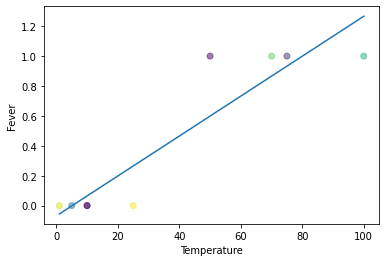

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Linear Regression Problem 2: Fever points are not predicted with the presence of outliers**
    
Previously at least some points could be properly predicted. However, with the presence of outliers, everything goes wonky for simple linear regression, having no predictive capacity at all.    

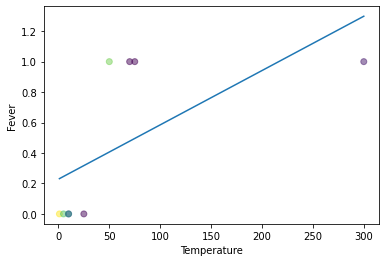

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

### 1.3 Logistic Regression In-Depth

#### Predicting Probability
- Linear regression doesn't work
- Instead of predicting direct values: **predict probability**
- cross-entropy loss

#### Logistic Function g()
- **"Two-class logistic regression"**
- $\boldsymbol{y} = A\boldsymbol{x} + \boldsymbol{b}$
    - Where $\boldsymbol{y}$ is a vector comprising the 2-class prediction $y_0$ and $y_1$
    - Where the labels are $y_0 = 0$  and $y_1 = 1$
    - Also, it's bolded because it's a vector, not a matrix.
- $g(y_1) = \frac {1} {1 + e^{-y_1}}$
    - $g(y_1)$ = Estimated probability that $y = 1$
- $g(y_0) = 1 - g(y_1)$
    - $g(y_0)$ = Estimated probability that $y = 0$
- For our illustration above, we have 4 classes, so we have to use softmax function explained below

#### Softmax Function g()
- **"Multi-class logistic regression"**
    - Generalization of logistic function, where you can derive back to the logistic function if you've a 2 class classification problem
    - Here, we will use a 4 class example (K = 4) as shown above to be very clear in how it relates back to that simple examaple.
- $\boldsymbol{y} = A\boldsymbol{x} + \boldsymbol{b}$
    - Where $\boldsymbol{y}$ is a vector comprising the 4-class prediction $y_0, y_1, y_2, y_3$
    - Where the 4 labels (K = 4) are $y_0 = 0, y_1 = 1, y_2 = 2, y_3 = 3$
- $g(y_i) = \frac {e^{y_i} } {\sum^K_i e^{y_i}}$ where K = 4 because we have 4 classes
    - To put numbers to this equation in relation to the illustration above where we've $y_0 = 1.3, y_1 = 1.2, y = 4.5, y = 4.8$
        - $g(y_0) = \frac {e^{1.3}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.017$
        - $g(y_1) = \frac {e^{1.2}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.015$
        - $g(y_2) = \frac {e^{4.5}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.412$
        - $g(y_3) = \frac {e^{4.8}}{e^{1.3} + e^{1.2} + e^{4.5} + e^{4.8}} = 0.556$
        - $g(y_0) + g(y_1) + g(y_2) + g(y_3) = 1.0$
        - All softmax outputs have to sum to one as they represent a probability distribution over K classes. 
- Take note how these numbers are not exactly as in the illustration in the softmax box but the concept is important (intentionally made so).
    - $y_0$ and $y_1$ are approximately similar in values and they return similar probabilities.
    - Similarly, $y_2$ and $y_3$ are approximately similar in values and they return similar probabilities.

#### Cross Entropy Function D() for 2 Class
- Take note that here, $S$ is our softmax outputs and $L$ are our labels
- $D(S, L) = -(L log S + (1-L)log(1-S))$
    - If L = 0 (label)
        - $D(S, 0) = - log(1-S)$
            - $- log(1-S)$: less positive if $S \longrightarrow 0$
            - $- log(1-S)$: more positive if $S \longrightarrow 1$ (BIGGER LOSS)
    - If L = 1 (label)
        - $D(S, 1) = - log S$
            - $-log(S)$: less positive if $S \longrightarrow 1$
            - $-log(S)$: more positive if $S \longrightarrow 0$ (BIGGER LOSS)

**Numerical example of bigger or small loss**

You get a small error of 1e-5 if your label = 0 and your S is closer to 0 (very correct prediction).

In [5]:
import math
print(-math.log(1 - 0.00001))

1.0000050000287824e-05


You get a large error of 11.51 if your label is 0 and S is near to 1 (very wrong prediction).

In [6]:
print(-math.log(1 - 0.99999))

11.51292546497478


You get a small error of 1e-5 if your label is 1 and S is near 1 (very correct prediction).

In [7]:
print(-math.log(0.99999))

1.0000050000287824e-05


You get a big error of 11.51 if your label is 1 and S is near 0 (very wrong prediction).

In [8]:
print(-math.log(0.00001))

11.512925464970229


#### Cross Entropy Function D() for More Than 2 Class
- For the case where we have more than 2 class, we need a more generalized function
- $D(S, L) = - \sum^K_1 L_i log(S_i)$
    - $K$: number of classes
    - $L_i$: label of i-th class, 1 if that's the class else 0
    - $S_i$: output of softmax for i-th class

#### Cross Entropy Loss over N samples
- Goal: Minimizing Cross Entropy Loss, L
- $Loss = \frac {1}{N} \sum_j^N D_j$
    - $D_j$: j-th sample of cross entropy function $D(S, L)$
    - $N$: number of samples
    - $Loss$: average cross entropy loss over N samples

## 2. Building a Logistic Regression Model with PyTorch

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1a: Loading MNIST Train Dataset
#### Images from 1 to 9

**Inspect length of training dataset**

You can easily load MNIST dataset with PyTorch. Here we inspect the training set, where our algorithms will learn from, and you will discover it is made up of 60,000 images.

In [9]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [11]:
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
len(train_dataset)

0it [00:00, ?it/s]

 97%|█████████████████████████████████████████████████████████████████▎ | 9658368/9912422 [00:12<00:00, 3103480.72it/s]

Extracting ./data/MNIST/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST/MNIST\raw



0it [00:00, ?it/s]


  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 47824.70it/s]                                                                                          

0it [00:00, ?it/s]

Extracting ./data/MNIST/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST\raw



 94%|███████████████████████████████████████████████████████████████▊    | 1548288/1648877 [00:06<00:00, 576129.89it/s]

0it [00:00, ?it/s]

Extracting ./data/MNIST/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST\raw




8192it [00:00, 16382.51it/s]                                                                                           


Extracting ./data/MNIST/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST\raw
Processing...
Done!


60000

9920512it [00:30, 3103480.72it/s]                                                                                      
1654784it [00:26, 576129.89it/s]                                                                                       

**Inspecting a single image**

So this is how a single image is represented in numbers. It's actually a 28 pixel x 28 pixel image which is why you would end up with this 28x28 matrix of numbers.

In [12]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

**Inspecting a single data point in the training dataset**

When you load MNIST dataset, each data point is actually a tuple containing the image matrix and the label.

In [18]:
type(train_dataset[0])

tuple

**Inspecting training dataset first element of tuple**

This means to access the image, you need to access the first element in the tuple.

In [31]:
# input matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

**Inspecting training dataset second element of tuple**

The second element actually represents the image's label. Meaning if the second element says 5, it means the 28x28 matrix of numbers represent a digit 5.

In [32]:
# label
train_dataset[0][1]

5

#### Displaying MNIST

**Verifying shape of MNIST image**

As mentioned, a single MNIST image is of the shape 28 pixel x 28 pixel.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

**Plot image of MNIST image**

In [28]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
show_img.shape

(28, 28)

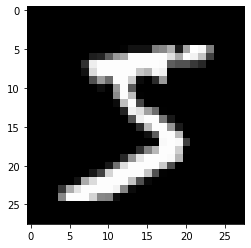

In [29]:
plt.imshow(show_img, cmap='gray')

**Second element of tuple shows label**

As you would expect, the label is 5.

In [30]:
#label
train_dataset[0][1]

5

**Plot second image of MNIST image**

In [34]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)

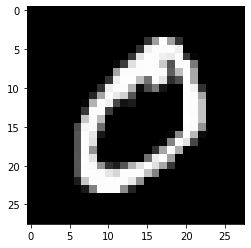

In [35]:
plt.imshow(show_img, cmap='gray')

**Second element of tuple shows label**

We should see 0 here as the label.

In [36]:
# label
train_dataset[1][1]

0

### Step 1b: Loading MNIST Test Dataset
- Show our algorithm works beyond the data we have trained on.
- Out-of-sample

**Load test dataset**

Compared to the 60k images in the training set, the testing set where the model will not be trained on has 10k images to check for its out-of-sample performance.

In [37]:
test_dataset = dsets.MNIST(root='./data/MNIST/', 
                           train=False, 
                           transform=transforms.ToTensor())

In [38]:
len(test_dataset)

10000

**Test dataset elements**

Exactly like the training set, the testing set has 10k tuples containing the 28x28 matrices and their respective labels.

In [39]:
type(test_dataset[0])

tuple

**Test dataset first element in tuple**

This contains the image matrix, similar to the training set.

In [40]:
# image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

**Plot image sample from test dataset**

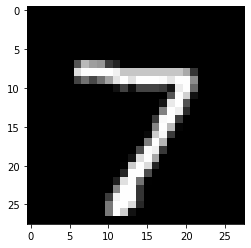

In [41]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

**Test dataset second element in tuple**

In [42]:
# label
test_dataset[0][1]

7

### Step 2: Make Dataset Iterable
- Aim: make the dataset iterable
- **totaldata**: 60000
- **minibatch**: 100
    - Number of examples in 1 iteration
- **iterations**: 3000
    - 1 iteration: one mini-batch forward & backward pass
- **epochs**
    - 1 epoch: running through the whole dataset once
    - $epochs = iterations \div \frac{totaldata}{minibatch} = 3000 \div \frac{60000}{100} = 5$

**Recap training dataset**

Remember training dataset has 60k images and testing dataset has 10k images.

In [43]:
len(train_dataset)

60000

**Defining epochs**

When the model goes through the whole 60k images once, learning how to classify 0-9, it's consider 1 epoch.

However, there's a concept of batch size where it means the model would look at 100 images before updating the model's weights, thereby learning. When the model updates its weights (parameters) after looking at all the images, this is considered 1 iteration.

In [44]:
batch_size = 100

We arbitrarily set 3000 iterations here which means the model would update 3000 times.

In [45]:
n_iters = 3000

One epoch consists of 60,000 / 100 = 600 iterations. Because we would like to go through 3000 iterations, this implies we would have 3000 / 600 = 5 epochs as each epoch has 600 iterations.

In [46]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

**Create Iterable Object: Training Dataset**

In [47]:
# iterable object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

**Check Iterability**

In [48]:
import collections
isinstance(train_loader, collections.Iterable)

True

**Create Iterable Object: Testing Dataset**

In [49]:
# iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

**Check iterability of testing dataset**

In [50]:
isinstance(test_loader, collections.Iterable)

True

**Iterate through dataset**

This is just a simplified example of what we're doing above where we're creating an iterable object `lst` to loop through so we can access all the images `img_1` and `img_2`.
    
Above, the equivalent of `lst` is `train_loader` and `test_loader`.
    

In [52]:
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

In [53]:
lst = [img_1, img_2]

### Step 3: Building Model

**Create model class**

In [54]:
# same as linear regression
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

### Step 4: Instantiate Model Class
- Input dimension: 
    - Size of image
    - $28 \times 28 = 784$
- Output dimension: 10
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

**Check size of dataset**

This should be 28x28.

In [55]:
# size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

**Instantiate model class based on input and out dimensions**

As we're trying to classify digits 0-9 a total of 10 classes, our output dimension is 10.

And we're feeding the model with 28x28 images, hence our input dimension is 28x28.

In [56]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

### Step 5: Instantiate Loss Class
- **Logistic Regression**: Cross Entropy Loss
    - _Linear Regression: MSE_
   

**Create Cross Entry Loss Class**

Unlike linear regression, we do not use MSE here, we need Cross Entry Loss to calculate our loss before we backpropagate and update our parameters.

In [57]:
criterion = nn.CrossEntropyLoss()

**What happens in `nn.CrossEntropyLoss()`?**

It does 2 things at the same time.


1. Computes softmax (logistic/softmax function) 
2. Computes cross entropy

<img src="./images/lab2/cross_entropy_final_4.png" alt="no_image" style="width: 900px;"/>

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

**Create optimizer**

Similar to what we've covered above, this calculates the parameters' gradients and update them subsequently.

In [64]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Parameters In-Depth**


You'll realize we have 2 sets of parameters, 10x784 which is A and 10x1 which is b in the $y = AX + b$ equation where X is our input of size 784.
    
We'll go into details subsequently how these parameters interact with our input to produce our 10x1 output. 

In [58]:
# Type of parameter object
print(model.parameters())

<generator object Module.parameters at 0x000001B5D1729228>


In [59]:
# Length of parameters
print(len(list(model.parameters())))

2


In [60]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0081, -0.0302,  0.0109,  ..., -0.0080, -0.0031,  0.0010],
         [ 0.0117, -0.0268,  0.0348,  ...,  0.0001, -0.0253, -0.0291],
         [-0.0126, -0.0150,  0.0332,  ..., -0.0253, -0.0311, -0.0002],
         ...,
         [-0.0056, -0.0271,  0.0261,  ..., -0.0053, -0.0354, -0.0263],
         [ 0.0092,  0.0335, -0.0316,  ..., -0.0327, -0.0076,  0.0129],
         [-0.0091,  0.0006, -0.0238,  ..., -0.0337,  0.0049,  0.0021]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0110,  0.0082,  0.0130, -0.0064,  0.0203,  0.0019,  0.0278,  0.0326,
         -0.0249, -0.0114], requires_grad=True)]

In [61]:
# FC 1 Parameters 
print(list(model.parameters())[0].size())

torch.Size([10, 784])


In [62]:
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

torch.Size([10])


**Quick Matrix Product Review**

- Example 1: **matrix product**
    - $A: (100, 10)$
    - $B: (10, 1)$
    - $A \cdot B = (100, 10) \cdot (10, 1) = (100, 1)$
- Example 2: **matrix product**
    - $A: (50, 5)$
    - $B: (5, 2)$
    - $A \cdot B = (50, 5) \cdot (5, 2) = (50, 2)$
- Example 3: **element-wise addition**
    - $A: (10, 1)$
    - $B: (10, 1)$
    - $A + B = (10, 1)$
        
<img src="./images/lab2/lr_params2.png" alt="no_image" style="width: 900px;"/>    

### Step 7: Train Model

**7 step process for training models**

 - Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [66]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load images as variable
        images = images.view(-1, 28*28)
        labels = labels
        
        # clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # forward pass to get output/logits
        outputs = model(images)
        
        # calculate loss : softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # getting gradients w.r.t. parameters
        loss.backward()
        
        # updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            
            # iterate through test dataset
            for images, labels in test_loader:
                # load images to a torch variable
                images = images.view(-1, 28*28)
                
                # forward pass only to get logits/output
                outputs = model(images)
                
                # get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # total number of labels
                total += labels.size(0)
                
                # total correct predictions
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct.item() / total
            
            # print loss
            print('iteration: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))

iteration: 500, loss: 1.5914448499679565, accuracy: 76.44
iteration: 1000, loss: 1.3247126340866089, accuracy: 79.75
iteration: 1500, loss: 1.1901869773864746, accuracy: 81.57
iteration: 2000, loss: 1.1496357917785645, accuracy: 82.5
iteration: 2500, loss: 1.0168027877807617, accuracy: 83.2
iteration: 3000, loss: 1.0037602186203003, accuracy: 83.77


#### Break Down Accuracy Calculation

**Printing outputs of our model**

As we've trained our model, we can extract the accuracy calculation portion to understand what's happening without re-training the model.

This would print out the output of the model's predictions on your notebook.

In [67]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('Outputs')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

Outputs
tensor([[-4.1912e-01, -1.1316e+00, -3.3780e-01,  5.0849e-02,  1.6380e-01,
         -4.5955e-01, -1.1082e+00,  3.2220e+00, -9.9257e-02,  8.3546e-01],
        [ 6.2732e-01,  5.0818e-02,  1.9713e+00,  1.1428e+00, -1.7106e+00,
          6.1820e-01,  1.4372e+00, -1.6908e+00,  4.6356e-01, -1.4948e+00],
        [-9.5425e-01,  2.4788e+00,  1.7959e-01,  1.3081e-01, -6.0669e-01,
         -2.7401e-01, -1.0602e-01, -4.2117e-01,  1.6995e-01, -4.4849e-01],
        [ 3.2173e+00, -2.5713e+00,  5.0179e-02, -9.7821e-02, -8.8109e-01,
          4.6438e-01,  1.1085e+00,  2.5932e-01, -4.3773e-01, -4.8476e-01],
        [-2.3028e-01, -2.0807e+00,  4.7810e-01, -6.9463e-01,  1.8244e+00,
         -3.3407e-01,  3.2245e-01,  3.8161e-01, -9.6695e-03,  9.6337e-01],
        [-1.3049e+00,  3.0202e+00,  1.7652e-01,  4.1544e-01, -6.7183e-01,
         -3.8085e-01, -6.9530e-01, -8.5968e-02,  4.6802e-01, -2.5801e-01],
        [-1.2533e+00, -1.2030e+00, -9.5699e-01,  9.7894e-02,  1.3802e+00,
          5.0112e-01, -7

**Printing output size**

This produces a 100x10 matrix because each iteration has a batch size of 100 and each prediction across the 10 classes, with the largest number indicating the likely number it is predicting.

In [68]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('Outputs')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

Outputs
torch.Size([100, 10])


**Printing one output**

This would be a 1x10 matrix where the largest number is what the model thinks the image is. Here we can see that in the tensor, position 7 has the largest number, indicating the model thinks the image is 7.

number 0: -0.4876

number 1: -2.2708

... 

number 7: 4.6617

In [69]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.4191, -1.1316, -0.3378,  0.0508,  0.1638, -0.4596, -1.1082,  3.2220,
        -0.0993,  0.8355], grad_fn=<SliceBackward>)


**Printing prediction output**

Because our output is of size 100 (our batch size), our prediction size would also of the size 100.

In [76]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted.size())

PREDICTION
torch.Size([100])


**Print prediction value**

We are printing our prediction which as verified above, should be digit 7.

In [78]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


**Print prediction, label and label size**

We are trying to show what we are predicting and the actual values. In this case, we're predicting the right value 7!

In [79]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])
        print('\n')
        print('LABEL SIZE')
        print(labels.size())
        print('\n')
        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(7)


LABEL SIZE
torch.Size([100])


LABEL FOR IMAGE 0
tensor(7)


**Print second prediction and ground truth**

Again, the prediction is correct. Naturally, as our model is quite competent in this simple task.

In [80]:
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


**Print accuracy**

Now we know what each object represents, we can understand how we arrived at our accuracy numbers.
    
One last thing to note is that `correct.item()` has this syntax is because `correct` is a PyTorch tensor and to get the value to compute with `total` which is an integer, we need to do this.

In [81]:
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # total number of labels
    total += labels.size(0)
    
    # total correct predictions
    correct += (predicted == labels).sum()
    
accuracy = 100 * (correct.item() / total)

print(accuracy)

83.77


**Explanation of Python's `.sum()` function**

Python's `.sum()` function allows you to do a comparison between two matrices and sum the ones that return `True` or in our case, those predictions that match actual labels (correct predictions).

In [82]:
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)

print((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


#### Saving Model

**Saving PyTorch model**

This is how you save your model. Feel free to just change `save_model = True` to save your model

In [87]:
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'model.pkl')

## 3. Building a Logistic Regression Model with PyTorch (GPU)

**CPU version**

The usual 7-step process, getting repetitive by now which we like.

In [92]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: loading dataset
'''
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
test_dataset = dsets.MNIST(root='./data/MNIST/',
                          train=False,
                          transform=transforms.ToTensor())

'''
STEP 2 : making dataset iterable
'''
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle=False)

'''
STEP 3: create model class
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 4: instantiate model class
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

'''
STEP 5: instantiate loss class
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: instantiate optimizer class
'''
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


'''
STEP 7: train the model
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load images
        images = images.view(-1, 28*28)
        labels = labels
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward pass to get output
        # 100 x 10
        outputs = model(images)
        
        # calculate loss: softmax -> cross entropy loss
        loss = criterion(outputs, labels)
        
        # getting gradients
        loss.backward()
        
        # updating parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            
            # iterate through test dataset
            for images, labels in test_loader:
                images = images.view(-1, 28*28)
                # forward
                outputs = model(images)
                # get predictions
                _, predicted = torch.max(outputs.data, 1)
                # total number of labels
                total += labels.size(0)
                # total correct predictions
                correct += (predicted==labels).sum()
                
            accuracy = 100*correct.item()/total
            
            # print loss
            print('iteration: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))

iteration: 500, loss: 1.799738883972168, accuracy: 65.65
iteration: 1000, loss: 1.5458807945251465, accuracy: 74.9
iteration: 1500, loss: 1.3627903461456299, accuracy: 78.62
iteration: 2000, loss: 1.182202935218811, accuracy: 80.51
iteration: 2500, loss: 1.090092420578003, accuracy: 81.69
iteration: 3000, loss: 1.018148422241211, accuracy: 82.63


**GPU Version**

2 things must be on GPU 
- `model`
- `tensors`

Remember step 4 and 7 will be affected and this will be the same for all model building moving forward.

In [93]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: loading dataset
'''
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
test_dataset = dsets.MNIST(root='./data/MNIST/',
                          train=False,
                          transform=transforms.ToTensor())

'''
STEP 2 : making dataset iterable
'''
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size = batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size = batch_size,
                                         shuffle=False)

'''
STEP 3: create model class
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
'''
STEP 4: instantiate model class
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: instantiate loss class
'''
criterion = nn.CrossEntropyLoss()

'''
STEP 6: instantiate optimizer class
'''
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


'''
STEP 7: train the model
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # load images
        
        ########################
        #  USE GPU FOR TENSOR  #
        ########################
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward pass to get output
        # 100 x 10
        outputs = model(images)
        
        # calculate loss: softmax -> cross entropy loss
        loss = criterion(outputs, labels)
        
        # getting gradients
        loss.backward()
        
        # updating parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            
            # iterate through test dataset
            for images, labels in test_loader:
                ########################
                #  USE GPU FOR TENSOR  #
                ########################
                images = images.view(-1, 28*28).to(device)
                
                # forward
                outputs = model(images)
                
                # get predictions
                _, predicted = torch.max(outputs.data, 1)
                
                # total number of labels
                total += labels.size(0)
                
                # total correct predictions
                ########################
                #  USE GPU FOR TENSOR  #
                ########################
                if torch.cuda.is_available():
                    correct += (predicted.cpu()==labels.cpu()).sum()
                else:
                    correct += (predicted==labels).sum()
            accuracy = 100*correct.item()/total
            
            # print loss
            print('iteration: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))

iteration: 500, loss: 1.871890902519226, accuracy: 67.89
iteration: 1000, loss: 1.5203700065612793, accuracy: 76.31
iteration: 1500, loss: 1.3976773023605347, accuracy: 79.15
iteration: 2000, loss: 1.1869350671768188, accuracy: 81.0
iteration: 2500, loss: 1.069792628288269, accuracy: 81.94
iteration: 3000, loss: 1.1011682748794556, accuracy: 82.86


## Summary

- **Logistic regression** basics
- **Problems** of **linear regression**
- **In-depth** Logistic Regression
    1. Get logits
    2. Get softmax
    3. Get cross-entropy loss
- **Aim**: reduce cross-entropy loss
- Built a **logistic regression model** in **CPU and GPU**
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`

# Feedforward Neural Network with PyTorch
## 1. About Feedforward Neural Network

### 1.1 Logistic Regression Transition to Neural Networks

#### Logistic Regression Review

<img src="./images/lab2/cross_entropy_final_4.png" alt="no_image" style="width: 900px;"/>

**Define logistic regression model**

Import our relevant torch modules.

In [1]:
import torch
import torch.nn as nn

Define our model class.

In [2]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return x

Instantiate the logistic regression model.

In [3]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

When we inspect the model, we would have an input size of 784 (derived from 28 x 28) and output size of 10 (which is the number of classes we are classifying from 0 to 9).

In [4]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


#### Logistic Regression Problems
- Can represent **linear** functions well
    - $ y = 2x + 3$
    - $ y = x_1 + x_2 $
    - $ y = x_1 + 3x_2 + 4x_3 $
- Cannot represent **non-linear** functions
    - $ y = 4x_1 + 2x_2^2 +3x_3^3 $
    - $ y = x_1x_2$
       
### 1.2 Introducing a Non-linear Function

<img src="./images/lab2/logistic_regression_comparison_nn5.png" alt="no_image" style="width: 900px;"/>


### Non-linear Function In-Depth
- Function: takes a number & perform mathematical operation
- Common Types of Non-linearity
    - ReLUs (Rectified Linear Units)      
    - Sigmoid     
    - Tanh

#### Sigmoid (Logistic)
- $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Input number $\rightarrow$ [0, 1]
    - Large negative number $\rightarrow$ 0
    - Large positive number $\rightarrow$ 1
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this
    2. Outputs not centered around 0 
        - If output always positive $\rightarrow$ gradients always positive or negative $\rightarrow$ **bad for gradient updates** 

#### Tanh
- $\tanh(x) = 2 \sigma(2x) -1$
    - A scaled sigmoid function
- Input number $\rightarrow$ [-1, 1]
- Cons: 
    1. Activation saturates at 0 or 1 with **gradients $\approx$ 0**
        - No signal to update weights $\rightarrow$ **cannot learn**
        - **Solution**: Have to carefully initialize weights to prevent this

 
#### ReLUs
- $f(x) = \max(0, x)$
- Pros:
    1. Accelerates convergence $\rightarrow$ **train faster**
    2. **Less computationally expensive operation** compared to Sigmoid/Tanh exponentials
- Cons:
    1. Many ReLU units "die" $\rightarrow$ **gradients = 0** forever
        - **Solution**: careful learning rate choice
      


## 2. Building a Feedforward Neural Network with PyTorch

### Model A: 1 Hidden Layer Feedforward Neural Network (Sigmoid Activation)
<img src="./images/lab2/nn1.png" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

### Step 1: Loading MNIST Train Dataset
**Images from 1 to 9**

Similar to what we did in logistic regression, we will be using the same MNIST dataset where we load our training and testing datasets.

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [6]:
train_dataset = dsets.MNIST(root='./data/MINST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)
test_dataset = dsets.MNIST(root='./data/MINST/',
                           train=False,
                           transform=transforms.ToTensor())

0it [00:00, ?it/s]

9920512it [00:03, 3243695.80it/s]                                                                                      


Extracting ./data/MINST/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MINST/MNIST\raw


0it [00:00, ?it/s]

32768it [00:00, 64672.01it/s]                                                                                          
0it [00:00, ?it/s]

Extracting ./data/MINST/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MINST/MNIST\raw


1654784it [00:01, 1111327.35it/s]                                                                                      
0it [00:00, ?it/s]

Extracting ./data/MINST/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MINST/MNIST\raw


8192it [00:00, 19416.33it/s]                                                                                           


Extracting ./data/MINST/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MINST/MNIST\raw
Processing...
Done!


### Step 2: Make Dataset Iterable

**Batch sizes and iterations**

Because we have 60000 training samples (images), we need to split them up to small groups (batches) and pass these batches of samples to our feedforward neural network subsesquently.

There are a few reasons why we split them into batches. Passing your whole dataset as a single batch would:

(1) require a lot of RAM/VRAM on your CPU/GPU and this might result in Out-of-Memory (OOM) errors.

(2) cause unstable training if you just use all the errors accumulated in 60,000 images to update the model rather than gradually update the model. In layman terms, imagine you accumulated errors for a student taking an exam with 60,000 questions and punish the student all at the same time. It is much harder for the student to learn compared to letting the student learn it made mistakes and did well in smaller batches of questions like mini-tests!

If we have 60,000 images and we want a batch size of 100, then we would have 600 iterations where each iteration involves passing 100 images to the model and getting their respective predictions.

In [7]:
60000/100

600.0

**Epochs**

An epoch means that you have successfully passed the whole training set, 60,000 images, to the model. Continuing our example above, an epoch consists of 600 iterations.

If we want to go through the whole dataset 5 times (5 epochs) for the model to learn, then we need 3000 iterations (600 x 5).

In [8]:
600 * 5

3000

**Bringing batch size, iterations and epochs together**

As we have gone through above, we want to have 5 epochs, where each epoch would have 600 iterations and each iteration has a batch size of 100.

Because we want 5 epochs, we need a total of 3000 iterations.

In [9]:
batch_size = 100
n_iters = 3000 # total data / batch_size * epoch
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

### Step 3: Create Model Class

**Creating our feedforward neural network**

Compared to logistic regression with only a single linear layer, we know for an FNN we need an additional linear layer and non-linear layer.

This translates to just 4 more lines of code!

In [10]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        
        # non-linearity
        self.sigmoid = nn.Sigmoid
        
        # linear function
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        return out

### Step 4: Instantiate Model Class

- **Input** dimension: **784** 
    - Size of image
    - $28 \times 28 = 784$
- **Output** dimension: **10**
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
- **Hidden** dimension: **100**
    - Can be any number
    - Similar term
        - Number of neurons
        - Number of non-linear activation functions


**Instantiating our model class**

Our input size is determined by the size of the image (numbers ranging from 0 to 9) which has a width of 28 pixels and a height of 28 pixels. Hence the size of our input is 784 (28 x 28).

Our output size is what we are trying to predict. When we pass an image to our model, it will try to predict if it's 0, 1, 2, 3, 4, 5, 6, 7, 8, or 9. That is a total of 10 classes, hence we have an output size of 10.

Now the tricky part is in determining our hidden layer size, that is the size of our first linear layer prior to the non-linear layer. This can be any number, a larger number implies a bigger model with more parameters. Intuitively we think a bigger model equates to a better model, but a bigger model requires more training samples to learn and converge to a good model (also called curse of dimensionality). Hence, it is wise to pick the model size for the problem at hand. Because it is a simple problem of recognizing digits, we typically would not need a big model to achieve state-of-the-art results.

On the flipside, too small of a hidden size would mean there would be insufficient model capacity to predict competently. In layman terms, too small of a capacity implies a smaller brain capacity so no matter how many training samples you give it, it has a maximum capacity in terms of its predictive power.

In [11]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

### Step 5: Instantiate Loss Class

- Feedforward Neural Network: **Cross Entropy Loss**
    - _Logistic Regression_: **Cross Entropy Loss**
    - _Linear Regression_: **MSE**

**Loss class**

This is exactly the same as what we did in logistic regression. Because we are going through a classification problem, cross entropy function is required to compute the loss between our softmax outputs and our binary labels.

In [12]:
criterion = nn.CrossEntropyLoss()

### Step 6: Instantiate Optimizer Class
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta$
        - $\theta$: parameters (our tensors with gradient accumulation capabilities)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
    - **At every iteration, we update our model's parameters**

**Optimizer class**

Learning rate determines how fast the algorithm learns. Too small and the algorithm learns too slowly, too large and the algorithm learns too fast resulting in instabilities.

Intuitively, we would think a larger learning rate would be better because we learn faster. But that's not true. Imagine we pass 10 images to a human to learn how to recognize whether the image is a hot dog or not, and it got half right and half wrong.

A well defined learning rate (neither too small or large) is equivalent to rewarding the human with a sweet for getting the first half right, and punishing the other half the human got wrong with a smack on the palm.

A large learning rate would be equivalent to feeding a thousand sweets to the human and smacking a thousand times on the human's palm. This would lead in a very unstable learning environment. Similarly, we will observe that the algorithm's convergence path will be extremely unstable if you use a large learning rate without reducing it subsequently.

We are using an optimization algorithm called Stochastic Gradient Descent (SGD) which is essentially what we covered above on calculating the parameters' gradients multiplied by the learning rate then using it to update our parameters gradually. There's an in-depth analysis of various optimization algorithms on top of SGD in another section.

In [13]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Parameters In-Depth

**Linear layers' parameters**

In a simple linear layer it's $Y = AX + B$, and our parameters are $A$ and bias $B$. 
    
Hence, each linear layer would have 2 groups of parameters  $A$ and $B$. It is critical to take note that our non-linear layers have no parameters to update. They are merely mathematical functions performed on $Y$, the output of our linear layers.
    
This would return a Python generator object, so you need to call list on the generator object to access anything meaningful.

In [14]:
print(model.parameters())

<generator object Module.parameters at 0x000001DD9AFB8A98>


Here we call list on the generator object and getting the length of the list. This would return 4 because we've 2 linear layers, and each layer has 2 groups of parameters $A$ and $b$.

In [15]:
print(len(list(model.parameters())))

4


Our first linear layer parameters, $A_1$, would be of size 100 x 784. This is because we've an input size of 784 (28 x 28) and a hidden size of 100.

In [16]:
# FC 1 Parameters 
print(list(model.parameters())[0].size())

torch.Size([100, 784])


Our first linear layer bias parameters, $B_1$, would be of size 100 which is our hidden size.

In [17]:
# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

torch.Size([100])


Our second linear layer is our readout layer, where the parameters $A_2$ would be of size 10 x 100. This is because our output size is 10 and hidden size is 100.

In [18]:
# FC 2 Parameters
print(list(model.parameters())[2].size())

torch.Size([10, 100])


Likewise our readout layer's bias $B_1$ would just be 10, the size of our output.

In [19]:
# FC 2 Bias Parameters
print(list(model.parameters())[3].size())

torch.Size([10])


The diagram below shows the interaction amongst our input $X$ and our linear layers' parameters $A_1$, $B_1$, $A_2$, and $B_2$ to reach to the final size of 10 x 1.

<img src="./images/lab2/nn1_params3.png" alt="no_image" style="width: 900px;"/>

### Step 7: Train Model
- Process 
    1. Convert inputs to tensors with gradient accumulation capabilities
    2. Clear gradient buffers
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

**7-step training process**

In [109]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.6416046619415283. Accuracy: 85.76
Iteration: 1000. Loss: 0.2638024687767029. Accuracy: 89.58
Iteration: 1500. Loss: 0.2913622558116913. Accuracy: 90.54
Iteration: 2000. Loss: 0.36239469051361084. Accuracy: 91.21
Iteration: 2500. Loss: 0.2494616061449051. Accuracy: 91.62
Iteration: 3000. Loss: 0.36123189330101013. Accuracy: 92.05


### Model B: 1 Hidden Layer Feedforward Neural Network (Tanh Activation)
<img src="./images/lab2/nn1.png" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

**1-layer FNN with Tanh Activation**

The only difference here compared to previously is that we are using Tanh activation instead of Sigmoid activation. This affects step 3.

In [22]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# 1. load dataset
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/',
                          train=False,
                          transform=transforms.ToTensor())

# 2. make dataset iterable
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3. create model class
class FFNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out
    
# 4. instantiate model class
input_dim = 28*28
output_dim = 10
hidden_dim = 100

model = FFNNModel(input_dim, hidden_dim, output_dim)

# 5. instantiate loss class
criterion = nn.CrossEntropyLoss()

# 6. instantiate optimizer class
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 7. train the model
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # convert inputs to tensors with gradient accumulation capabilities
        images = images.view(-1, 28*28)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward
        outputs = model(images)
        
        # calculate loss
        loss = criterion(outputs, labels)
        
        # get gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate acuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted==labels).sum()
                
            accuracy = 100 * correct.item() / total
            
            print('iter: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))
    

iter: 500, loss: 0.2872872054576874, accuracy: 91.01
iter: 1000, loss: 0.2652204930782318, accuracy: 92.55
iter: 1500, loss: 0.13556793332099915, accuracy: 93.41
iter: 2000, loss: 0.2442370355129242, accuracy: 94.2
iter: 2500, loss: 0.146214097738266, accuracy: 94.71
iter: 3000, loss: 0.15331757068634033, accuracy: 95.08


### Model C: 1 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/lab2/nn1.png" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

**1-layer FNN with ReLU Activation**

The only difference again is in using ReLU activation and it affects step 3.

In [23]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# 1. load dataset
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/',
                          train=False,
                          transform=transforms.ToTensor())

# 2. make dataset iterable
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3. create model class
class FFNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
# 4. instantiate model class
input_dim = 28*28
output_dim = 10
hidden_dim = 100

model = FFNNModel(input_dim, hidden_dim, output_dim)

# 5. instantiate loss class
criterion = nn.CrossEntropyLoss()

# 6. instantiate optimizer class
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 7. train the model
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # convert inputs to tensors with gradient accumulation capabilities
        images = images.view(-1, 28*28)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward
        outputs = model(images)
        
        # calculate loss
        loss = criterion(outputs, labels)
        
        # get gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate acuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted==labels).sum()
                
            accuracy = 100 * correct.item() / total
            
            print('iter: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))
    

iter: 500, loss: 0.22274595499038696, accuracy: 91.17
iter: 1000, loss: 0.3316263258457184, accuracy: 92.85
iter: 1500, loss: 0.22306746244430542, accuracy: 93.85
iter: 2000, loss: 0.31199389696121216, accuracy: 94.53
iter: 2500, loss: 0.19311437010765076, accuracy: 95.31
iter: 3000, loss: 0.2146567404270172, accuracy: 95.87


### Model D: 2 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/lab2/nn2.png" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

**2-layer FNN with ReLU Activation**

This is a bigger difference that increases your model's capacity by adding another linear layer and non-linear layer which affects step 3.

In [24]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# 1. load dataset
train_dataset = dsets.MNIST(root='./data/MNIST/',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/',
                          train=False,
                          transform=transforms.ToTensor())

# 2. make dataset iterable
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3. create model class
class FFNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
# 4. instantiate model class
input_dim = 28*28
output_dim = 10
hidden_dim = 100

model = FFNNModel(input_dim, hidden_dim, output_dim)

# 5. instantiate loss class
criterion = nn.CrossEntropyLoss()

# 6. instantiate optimizer class
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 7. train the model
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # convert inputs to tensors with gradient accumulation capabilities
        images = images.view(-1, 28*28)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward
        outputs = model(images)
        
        # calculate loss
        loss = criterion(outputs, labels)
        
        # get gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        iter += 1
        if iter % 500 == 0:
            # calculate acuracy
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted==labels).sum()
                
            accuracy = 100 * correct.item() / total
            
            print('iter: {}, loss: {}, accuracy: {}'.format(iter, loss.item(), accuracy))
    

iter: 500, loss: 0.18185226619243622, accuracy: 91.13
iter: 1000, loss: 0.1496511697769165, accuracy: 93.63
iter: 1500, loss: 0.17544814944267273, accuracy: 94.78
iter: 2000, loss: 0.1624055802822113, accuracy: 95.99
iter: 2500, loss: 0.06035758927464485, accuracy: 96.73
iter: 3000, loss: 0.07528278231620789, accuracy: 96.67


### Model E: 3 Hidden Layer Feedforward Neural Network (ReLU Activation)
<img src="./images/lab2/nn3.png" alt="no_image" style="width: 900px;"/>

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- **Step 3: Create Model Class**
- Step 4: Instantiate Model Class
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- Step 7: Train Model

**3-layer FNN with ReLU Activation**

Let's add one more layer! Bigger model capacity. But will it be better? Remember what we talked about on curse of dimensionality?

In [113]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data/MNIST/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.23731116950511932. Accuracy: 91.3
Iteration: 1000. Loss: 0.22314941883087158. Accuracy: 93.95
Iteration: 1500. Loss: 0.10083617269992828. Accuracy: 95.32
Iteration: 2000. Loss: 0.09337284415960312. Accuracy: 95.55
Iteration: 2500. Loss: 0.05002380535006523. Accuracy: 96.6
Iteration: 3000. Loss: 0.19129978120326996. Accuracy: 97.06


### General Comments on FNNs
- 2 ways to expand a neural network
    - More non-linear activation units (neurons)
    - More hidden layers 
- Cons
    - Need a larger dataset
        - Curse of dimensionality
    - Does not necessarily mean higher accuracy

## 3. Building a Feedforward Neural Network with PyTorch (GPU)

<img src="./images/lab2/nn3.png" alt="no_image" style="width: 900px;"/>

GPU: 2 things must be on GPU
- `model`
- `tensors with gradient accumulation capabilities`

### Steps
- Step 1: Load Dataset
- Step 2: Make Dataset Iterable
- Step 3: Create Model Class
- **Step 4: Instantiate Model Class**
- Step 5: Instantiate Loss Class
- Step 6: Instantiate Optimizer Class
- **Step 7: Train Model**

**3-layer FNN with ReLU Activation on GPU**

Only step 4 and 7 of the CPU code will be affected and it's a simple change.

In [25]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data/MNIST/', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/MNIST/', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()

        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()

        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        return out
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).to(device)
                labels = labels.to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.26560378074645996. Accuracy: 90.62
Iteration: 1000. Loss: 0.20822454988956451. Accuracy: 94.25
Iteration: 1500. Loss: 0.12326369434595108. Accuracy: 94.56
Iteration: 2000. Loss: 0.10073315352201462. Accuracy: 96.04
Iteration: 2500. Loss: 0.04586681351065636. Accuracy: 96.47
Iteration: 3000. Loss: 0.07458092272281647. Accuracy: 97.14


> **Alternative Term of Neural Network**
>
> The alternative term is **Universal Function Approximator**. This is because ultimately we are trying to find a function that maps our input, $X$, to our output, $y$. 

## Summary

- **Logistic Regression Problems**
    - Cannot represent **non-linear** functions
        - $ y = 4x_1 + 2x_2^2 +3x_3^3 $
        - $ y = x_1x_2$
- Introduced **Non-Linearity** to Logistic Regression to form a Neural Network
- **Types** of Non-Linearity
    - Sigmoid
    - Tanh
    - ReLU
- Feedforward Neural Network **Models**
    - Model A: 1 hidden layer (**sigmoid** activation)
    - Model B: 1 hidden layer (**tanh** activation)
    - Model C: 1 hidden layer (**ReLU** activation)
    - Model D: **2 hidden** layers (ReLU activation)
    - Model E: **3 hidden** layers (ReLU activation)
- Models Variation in **Code**
    - Modifying only step 3
- Ways to Expand Model’s **Capacity**
    - More non-linear activation units (**neurons**)
    - More hidden **layers**
- **Cons** of Expanding Capacity
    - Need more **data**
    - Does not necessarily mean higher **accuracy**
- **GPU** Code
    - 2 things on GPU
        - **model**
        - **tensors with gradient accumulation capabilities**
    - Modifying only **Step 4 & Step 7**
- **7 Step** Model Building Recap
    - Step 1: Load Dataset
    - Step 2: Make Dataset Iterable
    - Step 3: Create Model Class
    - Step 4: Instantiate Model Class
    - Step 5: Instantiate Loss Class
    - Step 6: Instantiate Optimizer Class
    - Step 7: Train Model


### *References*
[1] [DOI](https://zenodo.org/badge/139945544.svg)(https://zenodo.org/badge/latestdoi/139945544)